### Hubble's law and the age of the Universe


### Φορτώνουμε βιβλιοθήκες

In [1]:
import numpy as np
from numpy import nan

import matplotlib.pyplot as plt # Matplotlib = standard library for plots

from scipy.optimize import curve_fit 

# Ελεγχουμε ότι βρισκόμαστε στη σωστή directory
!pwd

/Users/kdasyra/Library/Mobile Documents/com~apple~CloudDocs/courses/lab/εισαγωγης/2023/partB_galaxies


### Μετρήσεις 

In [3]:
# ΣΗΜΕΙΩΣΤΕ ΤΙΣ ΜΕΤΡΗΣΕΙΣ ΣΑΣ ΓΙΑ ΚΑΘΕ ΓΑΛΑΞΙΑ

# ang_size1, ang_size2, ang_size3, lambda_CaK, lambda_CaH, lambda_Ha
data=np.array([
[1.82, 2.0, 1.44, 3962.2, 3997.,6608.2],   #NGC1357
[1.65,1.4,1.5,    3959.8,3995.5,6606.7],   # another galaxy
[0.982,1.0,0.7,    3965.3,3996.2,6614],    # yet another galaxy
]).T                                       # .T παίρνει τον ΑΝΑΣΤΡΟΦΟ πίνακα: γραμμές <-> στήλες

lambda_obs_CaK = data[3]
lambda_obs_CaH = data[4]
lambda_obs_Ha = data[5]

angular_diameter       = np.mean(data[0:3,:],axis=0) *1e-3 # μέση τιμή των 3 πρώτων γραμμών για κάθε κολώνα
angular_diameter_error =  np.std(data[0:3,:],axis=0) *1e-3 # τυπική απόκλιση των 3 πρώτων γραμμών για κάθε κολώνα

#print(angular_diameter,angular_diameter_error )

#lambda_obs_Ha.size

Σημείωση για γωνιακά μεγέθη
Υποθέτουμε ότι η διάμετρος ενός γαλαξία στον ουρανό είναι $d$ ($d\simeq 22\,\mathrm{kpc}$)

Για πολύ μικρή γωνία $\alpha$ μπορούμε να χρησιμποιήσουμε την $\tan \alpha \sim \alpha$
άρα
$$
\tan \alpha \sim \alpha = \frac{d}{D} \rightarrow  D=\frac{d}{\alpha}
$$

**ΠΡΟΣΟΧΗ: Υποθέτουμε Ευκλείδια κοσμολογία, ισχύει για πολύ κοντινούς μόνο!**

In [4]:
d_galaxy=22. *1e-3 #intrinsic diameter (22 kpc = 22*1e-3 Mpc)

distance = d_galaxy / angular_diameter # kpc

distance_error = d_galaxy / angular_diameter**2 * angular_diameter_error # kpc

print(distance, distance_error)

[12.54752852 14.50549451 24.60850112] [1.67050461 0.98261399 3.78143472]


### Eρυθρομετατόπιση
Λόγω του φαινομένου Doppler μια γραμμή εκπομπής (ή απορρόφησης) μετατοπίζεται από τη εργαστηριακή της τιμή $\lambda _\mathrm{emit}$ κατα $\delta \lambda=\lambda _\mathrm{obs}- \lambda _\mathrm{emit}$. 

Η σχετική ταχύτητα μπορεί να υπολογιστεί από τη σχέση $V=z c $ όπου $z$ ορίζουμε τη ποσότητα $ z=\frac{\delta \lambda}{\lambda _\mathrm{emit}}$, άρα

$$
V=c \frac{\delta \lambda}{\lambda _\mathrm{emit}}
$$

Εργαστηριακές τιμές: γραμμή Ca K = 3933.7 A, Ca H = 3968.5 A και Ha = 6562.8 A



In [5]:
def compute_redshift(lambda_obs,lambda_emit): return (lambda_obs-lambda_emit)/lambda_emit
    
z_CaK=compute_redshift(lambda_obs_CaK,3933.7)
z_CaH=compute_redshift(lambda_obs_CaH,3968.5)
z_Ha=compute_redshift(lambda_obs_Ha, 6562.8)

z_mean=(z_CaK+z_CaH+z_Ha)/3.

# In case you have nan's in your data you can use nanmean function which calculates the mean without taking care the nan values
# z_mean=np.nanmean([z_CAK,z_CAH,z_Ha],axis=0)
# z_std=np.nanstd([z_CAK,z_CAH,z_Ha],axis=0)

c=2.9979e5 #km/s
v=c*z_mean 

print(z_mean, v)



[0.00711481 0.00670926 0.00760489] [2132.9479968  2011.3681461  2279.86945485]


slope = (0.014 +/- 0.030) Mpc/(km/s)


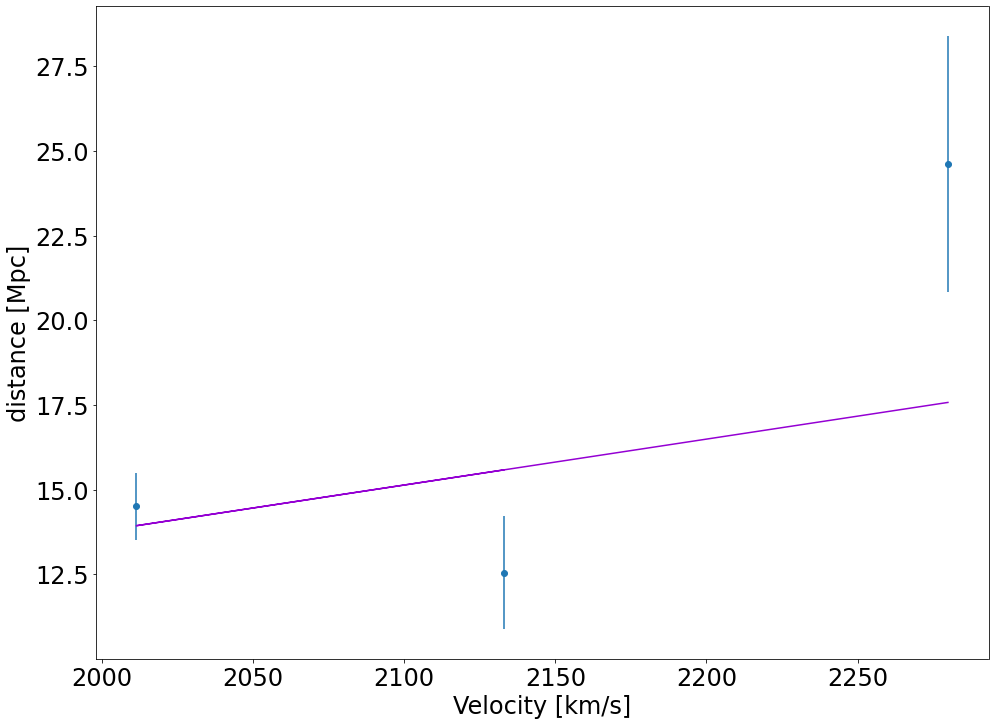

In [22]:
plt.errorbar(v,distance, yerr=distance_error,fmt='o')

plt.ylabel('distance [Mpc]')
plt.xlabel('Velocity [km/s]')
#plt.rcParams['figure.figsize'] = [16, 12] #  determines figure size
#plt.rcParams.update({'font.size':24})


def line(x,const,slope): return (const+slope*x)
popt, pcov = curve_fit(line, v, distance, sigma=distance_error)
#popt, pcov = curve_fit(line, v, distance, sigma=sigma=0.1*distance) - σκεφτείτε επίσης αυτό.

const=popt[0]
slope=popt[1]
dpopt=np.sqrt(np.diag(pcov)) 

print(f"slope = ({slope:.3f} +/- {dpopt[1]:.3f}) Mpc/(km/s)") 

# plot the best fit model
plt.plot(v,const+slope*v,label='best line',color='darkviolet')


### Εκτίμηση μιας (ελάχιστης) ηλικίας του Σύμπαντος
Προκύπτει από την απόσταση δια την ταχύτητα, που μας λέει πόσο χρόνο πήρε το φως να έρθει από το εκάστοτε σημείο (π.χ. από το μακρυνότερο γαλαξία) σε ένα Ευκλειδιο, γραμμικό Σύμπαν. Αρα προκύπτει από την κλίση του παραπάνω γραφήματος. Προσοχή στις μονάδες: 1 Mpc = 3.09e19 km και 1s = 3.17e-17 Gyrs
άρα 1 Mpc/(km/s) = 978 Gyrs $\sim$ 1000 Gyrs !

In [23]:
print("A rough estimate of the age of the Universe")
print("from the slope [Gyrs]:",slope*978)
#print(f"{age_of_universe:.2E} yrs")

A rough estimate of the age of the Universe
from the slope [Gyrs]: 13.262086655522278


Ανάστροφα, ο Hubble έκανε το γράφημα V συναρτήσει του D οπότε το 1/slope που μολις βρήκαμε είναι η σταθερά που πήρε το ονομά του. Παρακάτω θα κάνουμε το γράφημα όπως αυτός και θα συγκρίνουμε με τιμές της βιβλιογραφίας.

In [24]:
### ΓΡΑΨΤΕ ΤΟΝ ΚΩΔΙΚΑ ΓΙΑ ΝΑ ΚΑΝΕΤΕ ΤΟ ΓΡΑΦΗΜΑ, ΒΡΕΙΤΕ ΚΑΙ ΤΟ ΣΦΑΛΜΑ ΣΤΟ Η0
H0 = 1/slope

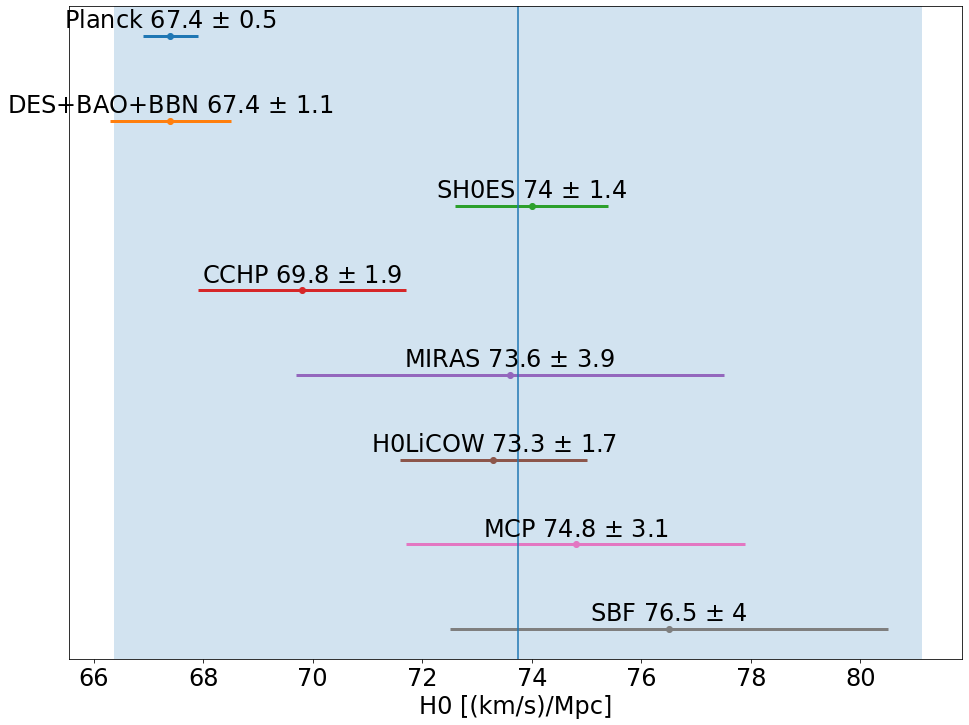

In [25]:
## ΣΥΓΚΡΙΝΕΤΕ ΜΕ ΜΕΡΙΚΆ ΠΕΙΡΑΜΑΤΑ ΑΠΟ ΤΗ ΒΙΒΛΙΟΓΡΑΦΙΑ
Hvals={"Planck":[67.4,0.5],
"DES+BAO+BBN":[67.4,1.1],
"SH0ES":[74,1.4],
"CCHP":[69.8,1.9],
"MIRAS":[73.6,3.9],
"H0LiCOW":[73.3,1.7],
"MCP":[74.8,3.1],
"SBF":[76.5,4],}
Y=10
for val in Hvals:
    Y=Y-1
    plt.text(Hvals[val][0],Y+0.1,val+f" {Hvals[val][0]} $\pm$ {Hvals[val][1]}",horizontalalignment="center")
    plt.errorbar(Hvals[val][0],Y,fmt='o',yerr=0,xerr=Hvals[val][1],linewidth=3)
plt.xlabel("H0 [(km/s)/Mpc]")
plt.tick_params(axis='y',which='both',left=False, labelleft=False)
plt.axvline(H0)
H0_error=0.1*H0        # ΒΑΛΤΕ ΣΩΣΤΑ ΤΟ ΣΦΑΛΜΑ ΣΑΣ ΕΔΩ
plt.axvspan(H0-H0_error,H0+H0_error,alpha=0.2)